In [89]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [90]:
%run -i zero_reset_stored_variables.ipynb

Stored variables and their in-db values:
arch_capacity_geometry_variables             -> {'b': 1, 't': 0.5, 'e': 0.08333333333333333}
condition_factor                             -> [[0.7200000000000001, 0.7200000000000001, 0.720000
pier_local_scour_depth                       -> [[0.0, 0.2888888888888889, 0.5777777777777778, 0.8
Stored variables and their in-db values:


In [91]:
%run -i one_bridge_geometry.ipynb

Stored variables and their in-db values:
Stored variables and their in-db values:
Stored 'arch_capacity_geometry_variables' (dict)
Stored variables and their in-db values:
arch_capacity_geometry_variables             -> {'b': 1, 't': 0.5, 'e': 0.08333333333333333}


In [92]:
%store -r arch_capacity_geometry_variables

In [93]:
print(arch_capacity_geometry_variables)

{'b': 1, 't': 0.5, 'e': 0.08333333333333333}


In [94]:
b=arch_capacity_geometry_variables["b"] #https://www.w3schools.com/python/python_dictionaries_access.asp
t=arch_capacity_geometry_variables["t"]
e=arch_capacity_geometry_variables["e"]

normalised mean compressive unit:  11.799999999999999
characteristic_compressive_masonry = 4.691  MPa
k = 1.645
mean_compressive_masonry = 6.228  MPa
Stored 'compressive_resistances' (list)
4.691352777703492
6.2279668592488475
0.9341950288873271


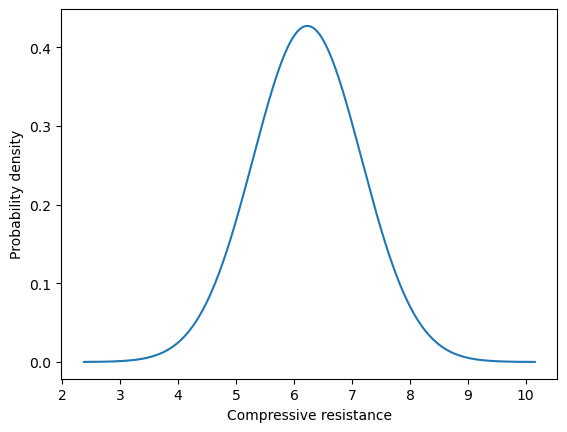

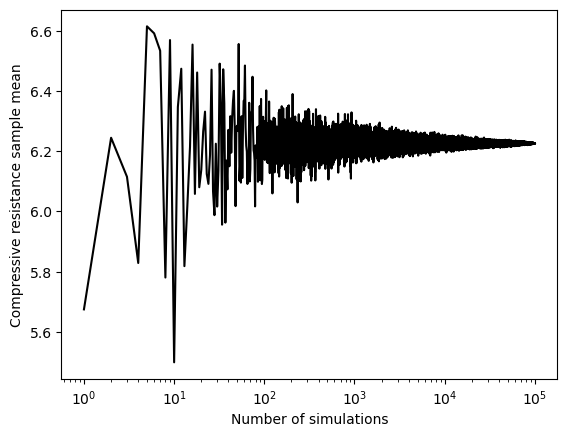

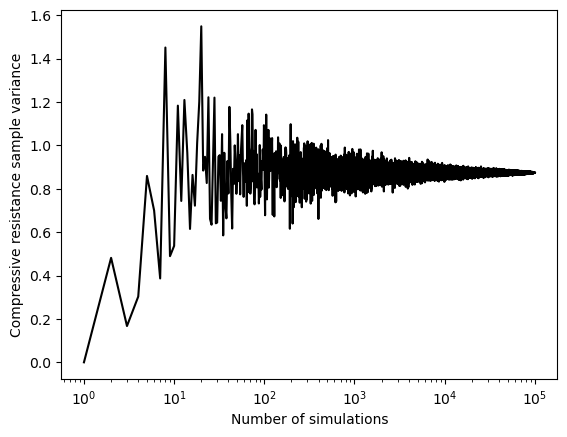

C:\Users\fn20944\AppData\Local\Temp\ipykernel_23104\814561038.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_second_moment=scipy.stats.moment(realisations[i], moment=2)


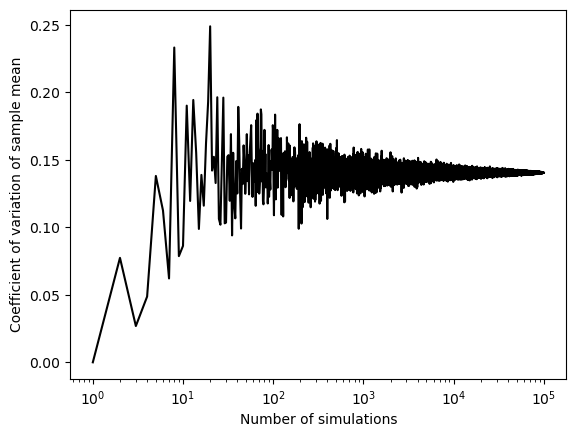

C:\Users\fn20944\AppData\Local\Temp\ipykernel_23104\3056112189.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_fourth_moment=scipy.stats.moment(realisations[i], moment=4)


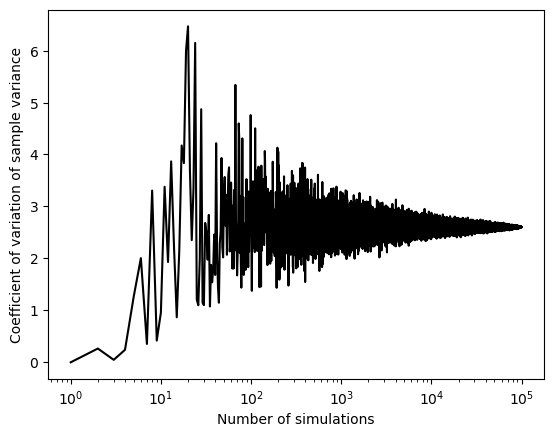

Stored 'compressive_resistance_realisations' (ndarray)
Stored 'convergence_simulation_number' (int)


In [95]:
%run -i three_compressive_resistance_sampling.ipynb

In [96]:
%store -r compressive_resistance_realisations

In [97]:
Rc=compressive_resistance_realisations
# type(Rc)

In [98]:
# # Rc = compressive_resistance_realisations
# Rc = np.random.normal(100, 20, 100_000) #to run the code with fake Rc realisations during implementation

1
[[0.7200000000000001, 0.7200000000000001, 0.7200000000000001, 0.7200000000000001, 0.6617142857142858, 0.5725714285714285, 0.4834285714285714, 0.3942857142857141, 0.3051428571428569, 0.21599999999999975]]
[[0.0, 0.2888888888888889, 0.5777777777777778, 0.8666666666666667, 1.1555555555555557, 1.4444444444444446, 1.7333333333333334, 2.0222222222222226, 2.3111111111111113, 2.6]]
Stored 'condition_factor' (list)
Stored 'pier_local_scour_depth' (list)


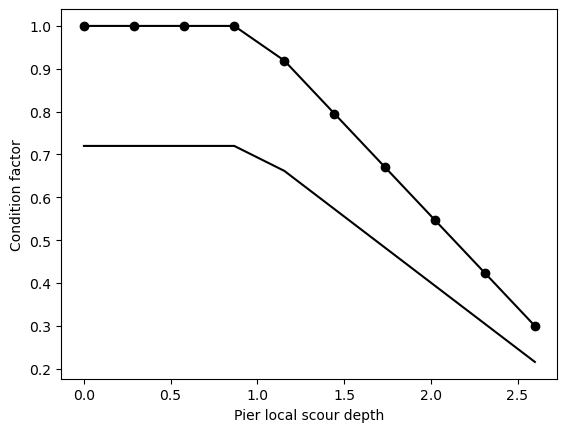

Stored variables and their in-db values:
arch_capacity_geometry_variables                -> {'b': 1, 't': 0.5, 'e': 0.08333333333333333}
compressive_resistance_realisations             -> array([6.07743858, 4.41155859, 6.34456247, ..., 6.
compressive_resistances                         -> [4.691352777703492, 6.2279668592488475]
condition_factor                                -> [[0.7200000000000001, 0.7200000000000001, 0.720000
convergence_simulation_number                   -> 100000
pier_local_scour_depth                          -> [[0.0, 0.2888888888888889, 0.5777777777777778, 0.8


In [99]:
%run -i four_arch_condition_factor.ipynb

In [100]:
%store

Stored variables and their in-db values:
arch_capacity_geometry_variables                -> {'b': 1, 't': 0.5, 'e': 0.08333333333333333}
compressive_resistance_realisations             -> array([6.07743858, 4.41155859, 6.34456247, ..., 6.
compressive_resistances                         -> [4.691352777703492, 6.2279668592488475]
condition_factor                                -> [[0.7200000000000001, 0.7200000000000001, 0.720000
convergence_simulation_number                   -> 100000
pier_local_scour_depth                          -> [[0.0, 0.2888888888888889, 0.5777777777777778, 0.8


In [101]:
%store -r condition_factor
%store -r pier_local_scour_depth

In [102]:
deterministic_coefficient = 0.6

In [103]:
arch_compressive_capacity=[]

In [104]:
def determine_compressive_capacity():

    for i in range(len(condition_factor[0])):
        compressive_capacity = deterministic_coefficient * condition_factor[0][i] * (Rc*1000*b*(t-2*e)) #https://en.wikipedia.org/wiki/Normal_distribution#Operations_on_a_single_normal_variable
        arch_compressive_capacity.append(compressive_capacity)
    
    print(arch_compressive_capacity[0:5])

    return arch_compressive_capacity

In [105]:
determine_compressive_capacity()

[array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
        829.31980242, 1048.50912856]), array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
        829.31980242, 1048.50912856]), array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
        829.31980242, 1048.50912856]), array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
        829.31980242, 1048.50912856]), array([804.30558596, 583.83826817, 839.65752509, ..., 799.41976778,
       762.18438984, 963.62981815])]


[array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
         829.31980242, 1048.50912856]),
 array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
         829.31980242, 1048.50912856]),
 array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
         829.31980242, 1048.50912856]),
 array([ 875.1511557 ,  635.26443687,  913.61699622, ...,  869.83498049,
         829.31980242, 1048.50912856]),
 array([804.30558596, 583.83826817, 839.65752509, ..., 799.41976778,
        762.18438984, 963.62981815]),
 array([695.95353811, 505.18648075, 726.54303985, ..., 691.72591305,
        659.50670002, 833.81440223]),
 array([587.60149026, 426.53469333, 613.4285546 , ..., 584.03205833,
        556.8290102 , 703.99898632]),
 array([479.24944241, 347.8829059 , 500.31406936, ..., 476.3382036 ,
        454.15132037, 574.1835704 ]),
 array([370.89739456, 269.23111848, 387.19958411, ..., 368.64434887,
        351.47363055, 444.36815448]),
 array([262.5

In [106]:
df_arch_compressive_capacity = pd.DataFrame(arch_compressive_capacity)
#https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
#https://stackoverflow.com/questions/48864746/replicating-excel-calculation-in-python-dataframe

In [107]:
df_arch_compressive_capacity.insert(0, "scour depth", pier_local_scour_depth[0], True) 
df_arch_compressive_capacity.insert(1, "condition factor", condition_factor[0], True) 

In [108]:
df_arch_compressive_capacity

,scour depth,condition factor,0,1,2,3,4,5,6,7,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,0.000000,0.720000,875.151156,635.264437,913.616996,874.921389,869.794257,837.772660,785.827247,937.664252,...,745.028480,652.786528,697.141561,1132.102869,777.981506,818.596400,1265.990620,869.834980,829.319802,1048.509129
1,0.288889,0.720000,875.151156,635.264437,913.616996,874.921389,869.794257,837.772660,785.827247,937.664252,...,745.028480,652.786528,697.141561,1132.102869,777.981506,818.596400,1265.990620,869.834980,829.319802,1048.509129
2,0.577778,0.720000,875.151156,635.264437,913.616996,874.921389,869.794257,837.772660,785.827247,937.664252,...,745.028480,652.786528,697.141561,1132.102869,777.981506,818.596400,1265.990620,869.834980,829.319802,1048.509129
3,0.866667,0.720000,875.151156,635.264437,913.616996,874.921389,869.794257,837.772660,785.827247,937.664252,...,745.028480,652.786528,697.141561,1132.102869,777.981506,818.596400,1265.990620,869.834980,829.319802,1048.509129
4,1.155556,0.661714,804.305586,583.838268,839.657525,804.094420,799.382341,769.952968,722.212660,861.758099,...,684.716651,599.941905,640.706292,1040.456446,715.002051,752.329072,1163.505665,799.419768,762.184390,963.629818
5,1.444444,0.572571,695.953538,505.186481,726.543040,695.770819,691.693529,666.228734,624.919763,745.666334,...,592.475030,519.120715,554.393527,900.291329,618.680531,650.979042,1006.763969,691.725913,659.506700,833.814402
6,1.733333,0.483429,587.601490,426.534693,613.428555,587.447219,584.004716,562.504500,527.626866,629.574570,...,500.233408,438.299526,468.080763,760.126212,522.359011,549.629011,850.022273,584.032058,556.829010,703.998986
7,2.022222,0.394286,479.249442,347.882906,500.314069,479.123618,476.315903,458.780266,430.333968,513.482805,...,407.991787,357.478337,381.767998,619.961095,426.037491,448.278981,693.280577,476.338204,454.151320,574.183570
8,2.311111,0.305143,370.897395,269.231118,387.199584,370.800017,368.627090,355.056032,333.041071,397.391040,...,315.750166,276.657148,295.455233,479.795978,329.715972,346.928950,536.538882,368.644349,351.473631,444.368154
9,2.600000,0.216000,262.545347,190.579331,274.085099,262.476417,260.938277,251.331798,235.748174,281.299276,...,223.508544,195.835958,209.142468,339.630861,233.394452,245.578920,379.797186,260.950494,248.795941,314.552739


In [109]:
arch_compressive_capacity_mean = [] #calculation of mean value of capacity realisations for each investigated condition factor

In [110]:
arch_compressive_capacity_vector = np.array(arch_compressive_capacity)  

In [111]:
def arch_compressive_capacity_mean_calculation():
    
    for i in range(len(arch_compressive_capacity_vector)):
        arch_compressive_capacity_vector_mean = np.mean(arch_compressive_capacity_vector[i])
        arch_compressive_capacity_mean.append(arch_compressive_capacity_vector_mean)
    
    return arch_compressive_capacity_mean

In [112]:
arch_compressive_capacity_mean_calculation()

[896.5581646686737,
 896.5581646686737,
 896.5581646686737,
 896.5581646686737,
 823.9796465764476,
 712.9772071412782,
 601.9747677061091,
 490.97232827093995,
 379.96988883577086,
 268.9674494006018]

In [113]:
arch_compressive_capacity_std=[] #calculation of std value of capacity realisations for each investigated condition factor

In [114]:
def arch_compressive_capacity_std_calculation():
    
    for i in range(len(arch_compressive_capacity_vector)):
        arch_compressive_capacity_vector_std = np.std(arch_compressive_capacity_vector[i])
        arch_compressive_capacity_std.append(arch_compressive_capacity_vector_std)
    
    return arch_compressive_capacity_std

In [115]:
arch_compressive_capacity_std_calculation()

[134.61835594091028,
 134.61835594091028,
 134.61835594091028,
 134.61835594091028,
 123.7206795075985,
 107.0536449625334,
 90.3866104174683,
 73.71957587240321,
 57.05254132733811,
 40.38550678227304]

In [120]:
example_indexes = (np.array(pier_local_scour_depth) > 1.00).nonzero() #https://stackoverflow.com/questions/16094563/numpy-get-index-where-value-is-true
first_example_indexes = example_indexes[1][0]

In [121]:
arch_compressive_capacity_pdf_input = np.linspace(arch_compressive_capacity_mean[first_example_indexes]-3*arch_compressive_capacity_std[first_example_indexes], arch_compressive_capacity_mean[first_example_indexes]+3*arch_compressive_capacity_std[first_example_indexes], len(Rc))

In [122]:
arch_compressive_capacity_pdf = scipy.stats.norm.pdf(arch_compressive_capacity_pdf_input, arch_compressive_capacity_mean[first_example_indexes], arch_compressive_capacity_std[first_example_indexes])

Text(0, 0.5, 'Probability density')

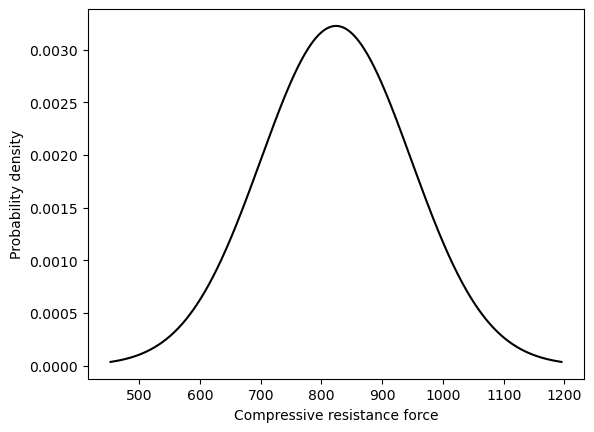

In [123]:
plt.plot(arch_compressive_capacity_pdf_input, arch_compressive_capacity_pdf, color='black')
plt.xlabel("Compressive resistance force")
plt.ylabel("Probability density")